# BUSINESS PROBLEM - 1

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mt
import re
import scipy
import statistics
import warnings
import statsmodels
from statsmodels.multivariate.manova import MANOVA


In [2]:
Loans=pd.read_csv(r'LoansData.csv',delimiter=',')
LoansData=Loans.copy()
LoansData.head()


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
LoansData.shape

(2500, 14)

In [4]:
LoansData.size

35000

In [5]:
LoansData.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [6]:
LoansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [7]:
LoansData.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [8]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [9]:
LoansData[LoansData.duplicated()]

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length


In [10]:
LoansData.columns = LoansData.columns.str.replace(".", "_")


<ipython-input-10-8bc80a32521b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  LoansData.columns = LoansData.columns.str.replace(".", "_")


In [11]:
LoansData.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [12]:
LoansData=LoansData.dropna()

In [13]:
LoansData.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

In [14]:
#removing the word ” years" and other symbol  from Employment_Length.
LoansData['Employment_Length'] = LoansData['Employment_Length'].str.replace(r'\D+', '', regex=True)

In [15]:
#removing the word ” months"  from loan Interest_Rate.
LoansData['Loan_Length']=LoansData['Loan_Length'].str.replace('months','')

In [16]:
#removing "%" symbol from Interest_Rate,Debt_To_Income_Ratio
LoansData['Interest_Rate']=LoansData['Interest_Rate'].str.replace('%','')
LoansData['Debt_To_Income_Ratio']=LoansData['Debt_To_Income_Ratio'].str.replace('%','')

In [17]:
#Converting data Types
#i)
LoansData['Interest_Rate']=LoansData.Interest_Rate.astype('float64') # change data type object to float64
#ii)
LoansData['Loan_Length']=LoansData.Loan_Length.astype('int64')# change data type object to int64
#iii)
LoansData['Debt_To_Income_Ratio']=LoansData.Debt_To_Income_Ratio.astype('float64') # change data type object to float64
#iv)
LoansData['FICO_Range']=LoansData.FICO_Range.astype('string')
LoansData['FICO_Range']=LoansData.FICO_Range.str.split('-')
#v)
LoansData['Inquiries_in_the_Last_6_Months']=LoansData.Inquiries_in_the_Last_6_Months.astype('int64')
#vi)
LoansData['Employment_Length'] = LoansData.Employment_Length.astype('int64')
#vii)
LoansData['Open_CREDIT_Lines']=LoansData.Open_CREDIT_Lines.astype('int64')

In [18]:
LoansData.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                   int64
dtype: object

In [19]:
#LoansData[LoansData.dtypes[LoansData.dtypes != "object"].index.values]

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [20]:
a=LoansData[['Amount_Funded_By_Investors','Interest_Rate']]

In [21]:
#Ho=intrest rate is not varied
#Ha=intrest rate is varied 

#continuous vs continuous
##pearsonr Correlation:
corr_value,Pvalue=scipy.stats.pearsonr(a['Interest_Rate'],a['Amount_Funded_By_Investors'])
#checking hypothesis:

def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 5.064256950483673e-63 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [22]:
#a[['Amount_Funded_By_Investors','Interest_Rate']].corr()

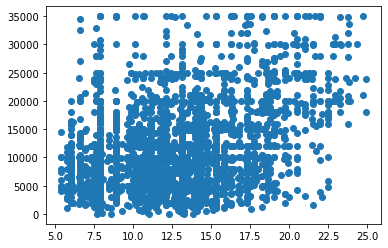

In [23]:
plt.scatter(a['Interest_Rate'],a['Amount_Funded_By_Investors'])

In [24]:
scipy.cov(a['Amount_Funded_By_Investors'],a['Interest_Rate'])[0][1]

<ipython-input-24-71729ba95435>:1: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  scipy.cov(a['Amount_Funded_By_Investors'],a['Interest_Rate'])[0][1]


10656.331586503833

In [25]:
scipy.corrcoef(a['Amount_Funded_By_Investors'],a['Interest_Rate'])

<ipython-input-25-41af6f39c25a>:1: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  scipy.corrcoef(a['Amount_Funded_By_Investors'],a['Interest_Rate'])


array([[1.        , 0.33159553],
       [0.33159553, 1.        ]])

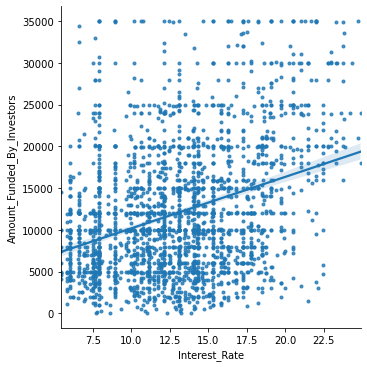

In [26]:
sns.lmplot(y='Amount_Funded_By_Investors',x='Interest_Rate',data=a,legend=True,markers='.')

 yes here we can say with 95% confidence Intrest rate is varied for different loan amounts.week positive relationship between "Amount_Funded_By_Investors" and "Interest_Rate" .

### b. Loan length is directly effecting intrest rate.

In [27]:
b=LoansData[['Loan_Length','Interest_Rate']]

In [28]:
b.Loan_Length.unique()

array([36, 60], dtype=int64)

In [29]:
scipy.stats.ttest_ind(b['Loan_Length'],b['Interest_Rate'])

Ttest_indResult(statistic=128.36728199919077, pvalue=0.0)

In [30]:
#Ho:Loan length is not effecting on intrest rate
#Ha:Loan length is directly effecting on intrest rate
#categorical(binary)  vs continuous

#T-test:

_,Pvalue=scipy.stats.ttest_ind(b['Loan_Length'],b['Interest_Rate'])
#checking hypothesis:

def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.0 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


yes here we can say with 95% confidence Loan length is directly effecting on intrest rate

<AxesSubplot:xlabel='Loan_Length', ylabel='Interest_Rate'>

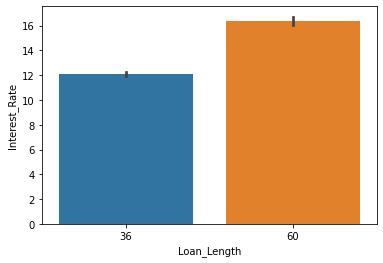

In [31]:
sns.barplot(x='Loan_Length',y='Interest_Rate',data=b )

<AxesSubplot:xlabel='Loan_Length', ylabel='Interest_Rate'>

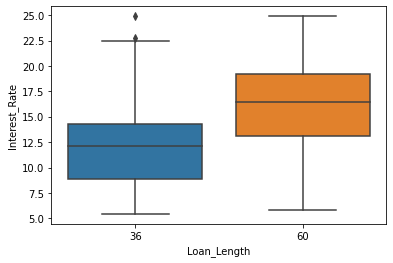

In [32]:
sns.boxplot(x='Loan_Length',y='Interest_Rate',data=b )

In [33]:
#Loan_Length observation 
b.groupby(b['Loan_Length']).describe()

Interest_Rate                                                  \
                    count       mean       std   min    25%    50%    75%   
Loan_Length                                                                 
36                 1876.0  12.130075  3.663183  5.42   8.90  12.12  14.33   
60                  537.0  16.378734  4.101119  5.79  13.11  16.49  19.22   

                    
               max  
Loan_Length         
36           24.89  
60           24.89

In [34]:
scipy.cov(b['Loan_Length'],b['Interest_Rate'])[0][1]

<ipython-input-34-673bbd080b53>:1: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  scipy.cov(b['Loan_Length'],b['Interest_Rate'])[0][1]


17.64963058722136

In [35]:
scipy.corrcoef(b['Loan_Length'],b['Interest_Rate'])

<ipython-input-35-d079f374034b>:1: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  scipy.corrcoef(b['Loan_Length'],b['Interest_Rate'])


array([[1.        , 0.42505738],
       [0.42505738, 1.        ]])

In [36]:
LoansData

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,"[735, 739]",14,14272.0,2,1
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,"[715, 719]",12,11140.0,1,2
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,"[690, 694]",14,21977.0,1,2
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,"[695, 699]",10,9346.0,0,5
4,12000.0,12000.00,11.71,36,credit_card,18.78,NJ,RENT,3195.00,"[695, 699]",11,14469.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23,NY,MORTGAGE,9250.00,"[705, 709]",15,45880.0,1,8
2496,16000.0,16000.00,14.09,60,home_improvement,21.54,MD,OWN,8903.25,"[740, 744]",18,18898.0,1,10
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89,PA,MORTGAGE,2166.67,"[680, 684]",4,4544.0,0,10
2498,6000.0,6000.00,12.42,36,major_purchase,16.66,NJ,RENT,3500.00,"[675, 679]",8,7753.0,0,5


### c.Inrest rate varies for different purpose of loans

In [37]:
c=LoansData[['Loan_Purpose','Interest_Rate']]

In [38]:
c.groupby(['Loan_Purpose']).describe()

Interest_Rate                                              \
                           count       mean       std   min      25%     50%   
Loan_Purpose                                                                   
car                         50.0  11.113000  3.940604  5.79   7.6850  10.475   
credit_card                430.0  13.025558  4.021337  5.42  10.1600  13.110   
debt_consolidation        1262.0  13.597773  4.116616  5.79  10.7400  13.490   
educational                 14.0  10.874286  3.442119  6.76   8.0575   9.755   
home_improvement           147.0  11.612041  4.289658  5.42   7.9000  11.120   
house                       20.0  13.448000  4.954452  5.99  10.1850  13.085   
major_purchase             100.0  10.827000  3.279356  5.42   7.7250  11.130   
medical                     28.0  11.763214  4.695454  5.42   7.5050  13.110   
moving                      29.0  13.621034  4.796949  5.79  10.7500  13.110   
other                      189.0  13.237037  4.057830  5.79  10.1600  13.110   
renewable_energy             4.0   9.877500  3.302266  6.92   7.6550   9.130   
small_business              83.0  12.892410  4.249753  5.79   9.6950  12.840   
vacation                    20.0  12.263000  3.957040  5.42   8.6800  12.895   
wedding                     37.0  11.958919  3.844805  5.42   8.0000  12.120   

                                    
                        75%    max  
Loan_Purpose                        
car                 13.8650  19.72  
credit_card         15.7625  24.70  
debt_consolidation  16.2900  24.89  
educational         13.2625  18.67  
home_improvement    14.0900  22.95  
house               16.0500  22.47  
major_purchase      13.4300  19.41  
medical             14.3650  23.28  
moving              15.3100  24.89  
other               16.2900  23.28  
renewable_energy    11.3525  14.33  
small_business      16.0050  21.98  
vacation            14.9375  18.39  
wedding             14.0900  22.45

In [39]:

#Ho:Inrest rate not varies for different purpose of loans
#Ha:Inrest rate varies for different purpose of loans

#categorical(more than two group) vs continuous
#ANOVA test
categorical_Group_list=c.groupby('Loan_Purpose')['Interest_Rate'].apply(list)
_,Pvalue=scipy.stats.f_oneway(*categorical_Group_list )

def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 2.7646672581411367e-14 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate', ylabel='Loan_Purpose'>

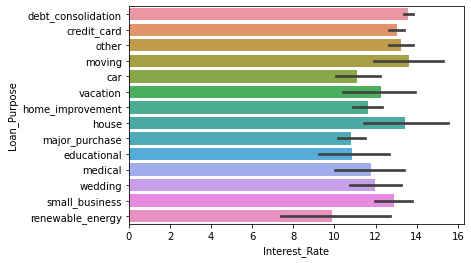

In [40]:
sns.barplot('Interest_Rate','Loan_Purpose',data=c)


### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [41]:
d=LoansData[['FICO_Range','Home_Ownership']]
FICO=d['FICO_Range']
U_F=[]
L_F=[]
for x,y in FICO:
            U_F.append(int(y))
            L_F.append(int(x))
FICO=pd.DataFrame(L_F,U_F).reindex()  
FICO=FICO.reset_index()
FICO['Lower_FICO_Range']=FICO[0]
FICO['Upper_FICO_Range']=FICO['index']
FICO=FICO.drop(columns=['index', 0],axis=1)
e=d.reset_index()
d=e.join(FICO).drop(columns=['index','FICO_Range'])
d

,Home_Ownership,Lower_FICO_Range,Upper_FICO_Range
0,MORTGAGE,735,739
1,MORTGAGE,715,719
2,MORTGAGE,690,694
3,MORTGAGE,695,699
4,RENT,695,699
...,...,...,...
2408,MORTGAGE,705,709
2409,OWN,740,744
2410,MORTGAGE,680,684
2411,RENT,675,679


In [42]:
score=[]
for U_Range in d['Upper_FICO_Range']:
    if U_Range <= 707: 
        score.append('Low')
    elif U_Range > 707 and U_Range < 770:
        score.append('Medium')
    elif U_Range >= 770:
        score.append('High')
    else:
        score.append("ERROR")
    
d['score']=score

In [43]:
#d[d['Home_Ownership']=='OWN'].groupby(['score'])['score'].count()
#d.groupby(['Home_Ownership','score'])['score'].count()
contingency=pd.crosstab(d['Home_Ownership'], d['score'])

In [44]:
_, Pvalue, __, ___ =scipy.stats.chi2_contingency(contingency)
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 6.752165448138336e-11 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


means that FICO scores and Home Ownership have relation but not surely that , People with owning home will have high FICO scores

In [45]:
contingency

score,High,Low,Medium
Home_Ownership,,,
MORTGAGE,102,524,483
OTHER,0,5,0
OWN,17,103,69
RENT,34,655,421


<AxesSubplot:xlabel='score'>

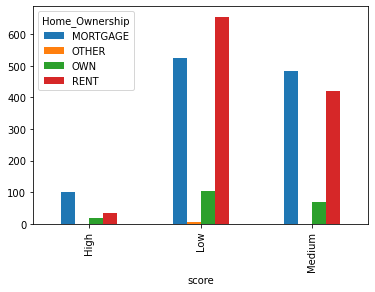

In [46]:
T=contingency.T
T.plot(kind='bar')

# BUSINESS PROBLEM - 2

In [47]:
Price_Quotes=pd.read_csv('Price_Quotes.csv')

In [48]:
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [49]:
average_difference ={'Barry_Price-':Price_Quotes['Barry_Price']/12,
          'Mary_Price-':Price_Quotes['Mary_Price']/12,
          'average_difference':(Price_Quotes['Barry_Price'] / 12) - (Price_Quotes['Mary_Price'] / 12)}
pd.DataFrame(average_difference)

,Barry_Price-,Mary_Price-,average_difference
0,10.500000,9.500000,1.000000
1,9.166667,9.833333,-0.666667
2,11.500000,9.500000,2.000000
3,11.833333,9.250000,2.583333
4,12.166667,10.750000,1.416667
5,11.333333,9.916667,1.416667
6,7.833333,8.083333,-0.250000
7,8.583333,8.666667,-0.083333
8,11.666667,10.583333,1.083333
9,12.666667,11.083333,1.583333


In [50]:
m_average = 0
b_average = 0

for i in range(12):
    
    m_average = m_average + Price_Quotes['Barry_Price'][i] / 12
    #print('Marry-',i,m_average)
print('m_average',Price_Quotes['Barry_Price'][i] / 12)

for j in range(12):
    b_average = b_average + Price_Quotes['Mary_Price'][j] / 12
    #print('Barry-',j,b_average)
print('b_average',Price_Quotes['Mary_Price'][j] / 12)


m_average 8.083333333333334
b_average 9.0


In [51]:
if m_average == b_average:
    print("There are same average prices")
else:
    print("There are different average prices")

There are different average prices


# BUSINESS PROBLEM -3:

In [52]:
Treatment_Facility=pd.read_csv("Treatment_Facility.csv")


In [53]:
#Treatment_Facility=Treatment_Facility.set_index('Month')

In [54]:
Treatment_Facility.head(5)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [55]:
#TRFF(%):temporarily removed from the facility
#CI (%):critical incident

Treatment_Facility.rename(columns={'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)

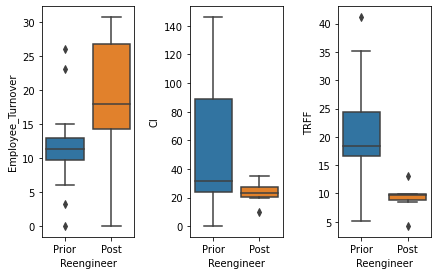

In [56]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=Treatment_Facility.Reengineer,y=Treatment_Facility.Employee_Turnover, ax=axs[0])
sns.boxplot(x=Treatment_Facility.Reengineer,y=Treatment_Facility.CI, ax=axs[1])
sns.boxplot(x=Treatment_Facility.Reengineer,y=Treatment_Facility.TRFF,ax=axs[2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.2)
plt.show()

In [57]:
#Ho:There is no effect of reengineering effort on  Employee_Turnover
#Ha:There is  effect of reengineering effort on  Employee_Turnover
#choosing random sample of Prior as  equal to Post 

s,Pvalue=scipy.stats.ttest_ind(Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer.eq('Prior')].sample(7,replace=True),Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer.eq('Post')], equal_var=False, alternative='less')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.009856726962285454 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [58]:
#Ho:There is no effect of reengineering effort on  Employee_Turnover
#Ha:There is  effect of reengineering effort on  Employee_Turnover

s,Pvalue=scipy.stats.ttest_ind(Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer.eq('Prior')],Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer.eq('Post')], equal_var=True, alternative='less')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.04680554672767652 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [59]:
#Ho:reengineering effort not changed the critical incidence rate.
#Ha:reengineering effort changed the critical incidence rate.

s,Pvalue=scipy.stats.ttest_ind(Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Prior')],Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Post')], 
                      equal_var=False,alternative='greater')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.022782759785096588 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [60]:
#finding Reengineer difference between Post data and Prior data
Mean=Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Post')].mean()-Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Prior')].mean()
Std=Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Post')].std()-Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Prior')].std()
Var=Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Post')].var()-Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Prior')].var()
MAD=Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Post')].mad()-Treatment_Facility.CI[Treatment_Facility.Reengineer.eq('Prior')].mad()
print('Mean:',Mean,'Standard deviation:',Std,'Variance:',Var,'mean absolute deviation:',MAD)

Mean: -30.538187041960434 Standard deviation: -40.887365677786825 Variance: -2310.288587708754 mean absolute deviation: -34.7700037551176


negative sign give us evidence that the critical incidence rate is decreased after Reengineer effort

<function matplotlib.pyplot.show(close=None, block=None)>

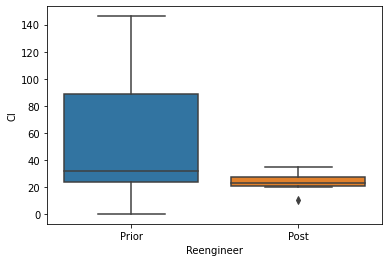

In [61]:
sns.boxplot(x=Treatment_Facility.Reengineer,y=Treatment_Facility.CI)
plt.show

# BUSINESS PROBLEM-4

In [62]:
Priority_Assessment=pd.read_csv('Priority_Assessment.csv')

In [63]:
Priority_Assessment.groupby('Priority')['Days'].mean()

Priority
High      3.023620
Low       4.228358
Medium    2.500000
Name: Days, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Priority', ylabel='Days'>

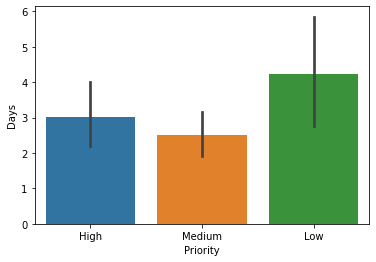

In [64]:
sns.barplot(Priority_Assessment.Priority,Priority_Assessment.Days)

In [65]:
#Ho: µ(High)=µ(Medium)=µ(Low)
#Ha: one Priority is diffrent from another two
s,Pvalue=scipy.stats.kruskal(Priority_Assessment.Days[Priority_Assessment.Priority.eq('High')],Priority_Assessment.Days[Priority_Assessment.Priority.eq('Medium')],Priority_Assessment.Days[Priority_Assessment.Priority.eq('Low')])
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.030305760547285312 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [66]:
#high priority jobs, on average, should be completed more quickly than medium priority jobs
#Ho:high priority jobs, on average, should not be  completed more quickly than medium priority jobs
#Ha:high priority jobs, on average, should be  completed more quickly than medium priority jobs
    
s,Pvalue=scipy.stats.ttest_ind(Priority_Assessment.Days[Priority_Assessment.Priority.eq('High')],Priority_Assessment.Days[Priority_Assessment.Priority.eq('Medium')],equal_var=False,alternative='less')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.8357702171701902 ) is greater then 0.05 so we can not reject Ho(null) hypothesis


In [67]:
#high priority jobs, on average, should be completed more quickly than medium priority jobs
#Ho:Medium priority jobs, on average, should not be  completed more quickly than Low priority jobs
#Ha:Medium priority jobs, on average, should be  completed more quickly than Low priority jobs
    
s,Pvalue=scipy.stats.ttest_ind(Priority_Assessment.Days[Priority_Assessment.Priority.eq('Medium')],Priority_Assessment.Days[Priority_Assessment.Priority.eq('Low')],equal_var=False,alternative='less')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.019977887476419157 )  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis 


In [68]:
#high priority jobs, on average, should be completed more quickly than medium priority jobs
#Ho:High priority jobs, on average, should not be  completed more quickly than Low priority jobs
#Ha:High priority jobs, on average, should be  completed more quickly than Low priority jobs
    
s,Pvalue=scipy.stats.ttest_ind(Priority_Assessment.Days[Priority_Assessment.Priority.eq('High')],Priority_Assessment.Days[Priority_Assessment.Priority.eq('Low')],equal_var=False,alternative='less')
def p_value(p):
    if p<0.05:
        print("P-value(",p,")  is less then 0.05 so we can reject Ho(null) hypothesis and accept Ha(alternative) hypothesis " )
    else:
        print("P-value(",p,") is greater then 0.05 so we can not reject Ho(null) hypothesis" )
p_value(Pvalue)

P-value( 0.08658763310564742 ) is greater then 0.05 so we can not reject Ho(null) hypothesis


'high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs.'
 
using 95% confidence interval we can't say surely given fact happening..

# BUSINESS PROBLEM-5

In [69]:
Films=pd.read_csv('Films.csv')
Films=Films.dropna()
Films=Films.drop('_rowstate_',axis=1)
Films['Gender']=Films['Gender'].replace(['Female','Male'],[2,1],inplace=False).astype('int64')
Films['Marital_Status']=Films['Marital_Status'].replace(['Single','Slngle','Married'],[2,2,1],inplace=False).astype('int64')
Films[['Sinage','Parking','Clean','Overall','Age','Income']]=Films[['Sinage','Parking','Clean','Overall','Age','Income']].astype('int64')
#Films['Hear_About']=Films['Hear_About'].str.replace(',', '').astype('int64')

In [70]:
Films.dtypes

Movie             object
Gender             int64
Marital_Status     int64
Sinage             int64
Parking            int64
Clean              int64
Overall            int64
Age                int64
Income             int64
Hear_About        object
dtype: object

In [71]:
#What is the overall level of customer satisfaction?

In [72]:
Films.groupby('Overall')[['Sinage','Parking','Clean']].mean()

,Sinage,Parking,Clean
Overall,,,
1,1.554745,1.364964,1.364964
2,2.101351,2.027027,1.918919
3,2.666667,2.666667,2.083333
4,3.000000,5.000000,2.000000
5,3.333333,3.666667,2.666667


In [73]:
#What factors are linked to satisfaction?

In [74]:
Films.corr()

,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income
Gender,1.000000,0.059875,-0.103779,-0.081853,-0.073708,-0.042774,-0.051682,-0.043455
Marital_Status,0.059875,1.000000,0.102818,-0.064377,-0.010047,0.037927,-0.570388,-0.376749
Sinage,-0.103779,0.102818,1.000000,0.470412,0.365028,0.410689,-0.091722,-0.029748
Parking,-0.081853,-0.064377,0.470412,1.000000,0.457018,0.547717,0.001640,-0.033455
Clean,-0.073708,-0.010047,0.365028,0.457018,1.000000,0.385523,-0.000745,0.007355
Overall,-0.042774,0.037927,0.410689,0.547717,0.385523,1.000000,-0.023926,-0.014984
Age,-0.051682,-0.570388,-0.091722,0.001640,-0.000745,-0.023926,1.000000,0.155053
Income,-0.043455,-0.376749,-0.029748,-0.033455,0.007355,-0.014984,0.155053,1.000000


<AxesSubplot:>

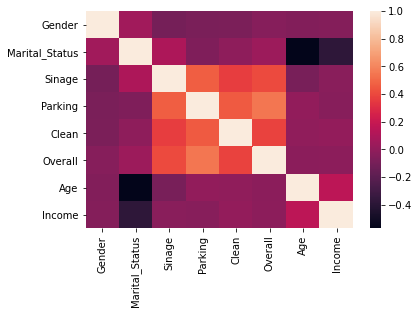

In [75]:
sns.heatmap(Films.corr())

In [76]:
IMPACTING=[]
col=['Gender','Marital_Status', 'Sinage','Parking','Clean','Age','Income','Hear_About']
for x in col:
    
    chi2,Pvalue,dof,expected=scipy.stats.chi2_contingency(pd.crosstab(Films.Overall, Films[(x)]))
    def p_value(p):
        if p<0.05:
            print('for',x,"P-value:",p,"linked to satisfaction" )
            IMPACTING.append(x)
        else:
            print('for',x,"P-value:",p,"Not linked to satisfaction" )
            
    p_value(Pvalue)
print('THIS FACTOR',IMPACTING,'IMPACTING ON Overall satisfaction' )

for Gender P-value: 0.4746946769990794 Not linked to satisfaction
for Marital_Status P-value: 0.317595469011392 Not linked to satisfaction
for Sinage P-value: 3.0544447763605627e-18 linked to satisfaction
for Parking P-value: 1.2264032549812005e-37 linked to satisfaction
for Clean P-value: 9.882317099745693e-20 linked to satisfaction
for Age P-value: 0.5267913370930692 Not linked to satisfaction
for Income P-value: 0.7631326888324932 Not linked to satisfaction
for Hear_About P-value: 0.9920532791201511 Not linked to satisfaction
THIS FACTOR ['Sinage', 'Parking', 'Clean'] IMPACTING ON Overall satisfaction


In [77]:
#What is the demographic profile of Film on the Rocks patrons?

In [78]:
Films.groupby(['Gender','Marital_Status','Age'])['Age','Sinage','Parking','Clean','Overall'].mean()

<ipython-input-78-c87ffaaf2cf9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Films.groupby(['Gender','Marital_Status','Age'])['Age','Sinage','Parking','Clean','Overall'].mean()


Age    Sinage   Parking     Clean   Overall
Gender Marital_Status Age                                             
1      1              2    2.0  1.875000  1.875000  1.375000  1.500000
                      3    3.0  1.680000  1.800000  1.680000  1.520000
                      4    4.0  2.000000  2.333333  2.000000  1.666667
       2              1    1.0  2.000000  2.250000  2.000000  1.750000
                      2    2.0  2.245283  1.905660  1.849057  1.773585
                      3    3.0  1.769231  1.615385  1.615385  1.538462
2      1              1    1.0  1.000000  1.000000  2.000000  1.000000
                      2    2.0  1.833333  2.166667  1.666667  2.000000
                      3    3.0  1.800000  1.822222  1.733333  1.555556
                      4    4.0  1.333333  2.000000  1.666667  2.000000
       2              1    1.0  1.647059  1.529412  1.470588  1.529412
                      2    2.0  1.927835  1.752577  1.659794  1.597938
                      3    3.0  1.720000  1.520000  1.520000  1.640000
                      4    4.0  1.000000  1.000000  1.000000  1.000000

In [79]:
#In what media outlet(s) should the film series be advertised?

In [183]:
Films.groupby(['Gender','Marital_Status','Age','Hear_About'])['Hear_About'].count()

Gender  Marital_Status  Age  Hear_About
1       1               2    1              1
                             3              1
                             4              1
                             5              5
                        3    1              1
                             2,5            1
                             3              3
                             3,5            1
                             4              2
                             5             17
                        4    1              1
                             3              1
                             5              1
        2               1    5              4
                        2    1              4
                             2              3
                             3              2
                             4              4
                             5             40
                        3    1              1
                             2,5        

In [178]:
Films.groupby(['Hear_About','Gender','Marital_Status','Age'])['Hear_About'].count()/Films.groupby('Hear_About')['Hear_About'].count().sum()

Hear_About  Gender  Marital_Status  Age
1           1       1               2      0.003322
                                    3      0.003322
                                    4      0.003322
                    2               2      0.013289
                                    3      0.003322
            2       1               2      0.003322
                                    3      0.006645
                                    4      0.003322
                    2               1      0.003322
                                    2      0.009967
                                    3      0.009967
1,5         2       2               1      0.003322
2           1       2               2      0.009967
            2       1               3      0.006645
                    2               1      0.003322
                                    2      0.009967
                                    3      0.006645
2,5         1       1               3      0.003322
                    2   

In [187]:
#(Films.groupby(['Hear_About','Marital_Status'])['Hear_About'].count()/Films.groupby('Hear_About')['Hear_About'].count().sum()).unstack()
#(Films.groupby(['Hear_About','Gender'])['Hear_About'].count()/Films.groupby('Hear_About')['Hear_About'].count().sum()).unstack()
#(Films.groupby(['Hear_About','Age'])['Hear_About'].count()/Films.groupby('Hear_About')['Hear_About'].count().sum()).unstack()
#(Films.groupby(['Hear_About','Income'])['Hear_About'].count()/Films.groupby('Hear_About')['Hear_About'].count().sum()).unstack()